In [10]:
import numpy as np
import pandas as pd
import pickle
import csv
import matplotlib.pyplot as plt
from scipy import stats
import math
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from numpy import linspace, meshgrid

In [55]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def removeOutliers_Idx(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)   
    Idx = np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))
    return(Idx)
    
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    result = a[np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))]
    
    return result.tolist()

def studentT_test(first_var, second_var):
    n_1 = len(first_var)
    mean_1 = np.mean(first_var)
    var_1 = np.var(first_var)
    
    n_2 = len(second_var)
    mean_2 = np.mean(second_var)
    var_2 = np.var(second_var)
    
    d_f = min(n_1 - 1, n_2 - 1)
    
    t_test = (mean_1 - mean_2) /math.sqrt(var_1/n_1 + var_2/n_2) 
    p_value = 1 - stats.t.cdf(t_test, d_f)
    
    return(t_test, p_value, n_1, n_2)

In [62]:
stl = pd.read_csv("STL.csv")
ets = pd.read_csv("ets.csv")
auto = pd.read_csv("autoTemp.csv")
NN = pd.read_csv("NN.csv")

In [7]:
class_dic = load_obj("class_dic")

In [61]:
ets_error = ets["meanError"].values
ets_error = removeOutliers(ets_error, 1.5)
         
stl_error = stl["meanError"].values
stl_error = removeOutliers(stl_error, 1.5)
        
auto_error = auto["meanError"].values
auto_error = removeOutliers(auto_error, 1.5)
        
NN_error = NN["meanError"].values
NN_error = removeOutliers(NN_error, 1.5)

In [138]:
len(stl_error)

590

In [139]:
# ets and stl are not different and they have same performance
stats.ttest_ind(ets_error,stl_error,equal_var = False)

Ttest_indResult(statistic=-0.021885624495291515, pvalue=0.9825429453278485)

In [140]:
# auto.arima and stl are different
stats.ttest_ind(auto_error,stl_error,equal_var = False)

Ttest_indResult(statistic=13.592249810792598, pvalue=2.619432119883204e-36)

In [143]:
#stl outperforms auto.arima
studentT_test(auto_error, stl_error)

(13.606374722607141, 0.0, 477, 590)

In [144]:
#ets outperforms auto.arima
studentT_test(auto_error, ets_error)

(13.593356691225793, 0.0, 477, 577)

In [145]:
# Neural Network and stl are different
stats.ttest_ind(NN_error,stl_error,equal_var = False)

Ttest_indResult(statistic=6.224261443236347, pvalue=6.74767810982762e-10)

In [ ]:
Both ETS and STL outperform Neural Network:

In [146]:
#stl outperforms auto.arima
studentT_test(NN_error, stl_error)

(6.229460294925986, 4.455882329779115e-10, 606, 590)

In [147]:
#ets outperforms auto.arima
studentT_test(NN_error, ets_error)

(6.179080521968353, 6.100525640206911e-10, 606, 577)

In [ ]:
Neural Network and auto.arima performance are different:

In [148]:
# Neural Network and auto.arima are different
stats.ttest_ind(NN_error,auto_error,equal_var = False)

Ttest_indResult(statistic=-11.214705232392294, pvalue=1.9167680031558427e-26)

In [ ]:
Neural Network outperforms auto.arima:

In [149]:
#ets outperforms auto.arima
studentT_test(auto_error, NN_error)

(11.22629052524761, 0.0, 477, 606)

In [112]:
climate_class = []
for i in range(len(stl)):  
    if stl["lon"][i] < 180:
        lon_key = stl["lon"][i] 
    else:
        lon_key = -(360 - stl["lon"][i])   
    lat_key = stl["lat"][i] 
    if (lat_key,lon_key) in class_dic.keys():
        climate_class.append(class_dic[(lat_key,lon_key)])
    else:
        climate_class.append("None")

In [113]:
climate_class_auto = []
for i in range(len(auto)):  
    if auto["lon"].values[i] < 180:
        lon_key = auto["lon"].values[i] 
    else:
        lon_key = -(360 - auto["lon"].values[i])   
    lat_key = auto["lat"].values[i] 
    if (lat_key,lon_key) in class_dic.keys():
        climate_class_auto.append(class_dic[(lat_key,lon_key)])
    else:
        climate_class_auto.append("None")

In [114]:
climate_class_NN = []
for i in range(len(NN)):  
    if NN["lon"].values[i] < 180:
        lon_key = NN["lon"].values[i] 
    else:
        lon_key = -(360 - NN["lon"].values[i])   
    lat_key = NN["lat"].values[i] 
    if (lat_key,lon_key) in class_dic.keys():
        climate_class_NN.append(class_dic[(lat_key,lon_key)])
    else:
        climate_class_NN.append("None")

In [67]:
#Xdata.loc[np.logical_and(np.logical_and(Xdata['year'] == curr_year,Xdata['lat'] == i),Xdata['lon'] == j),'mean_temp'] = np.nanmean(air[z*365 : z*365 + 365, i, j]

In [153]:
stl["meanErrorEts"] = ets["meanError"].values
stl["climateClasses"] = climate_class
auto["climateClasses"] = climate_class_auto
NN["climateClasses"] = climate_class_NN

In [154]:
classes = set(climate_class_auto)

In [155]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [156]:
item_class = []
p_values = []
t = []
significant = []
number = []
for item in classes:
    if item != "None":
        
        ets_error = ets.loc[stl['climateClasses'] == item]["meanError"]
        ets_error = removeOutliers(ets_error, 1.5)
         
        stl_error = stl.loc[stl['climateClasses'] == item]["meanError"]
        stl_error = removeOutliers(stl_error, 1.5)
        
        auto_error = auto.loc[auto['climateClasses'] == item]["meanError"]
        auto_error = removeOutliers(auto_error, 1.5)
        
        NN_error = NN.loc[NN['climateClasses'] == item]["meanError"]
        NN_error = removeOutliers(NN_error, 1.5)


        t_test, p_value, n_auto, n_NN = studentT_test(auto_error, NN_error) 
        
        item_class.append(item)
        t.append(t_test)
        number.append(n_NN)
        significant.append(p_value < 0.05)      
        p_values.append(p_value)

In [157]:
NN_auto = pd.DataFrame({"classes":item_class,"t test":t, "p_values":p_values, "95% significant": significant, "number":number})

In [158]:
NN_auto

,95% significant,classes,number,p_values,t test
0,False,Csa,26,0.1499,1.0677
1,True,Aw,108,0.0000,5.4871
2,False,Af,6,0.9890,-3.2822
3,False,BWk,13,0.1123,1.3319
4,True,Cwa,14,0.0218,2.2353
5,False,Cwb,7,0.0634,1.8295
6,False,As,4,0.8908,-1.7715
7,False,Cfb,3,0.2408,0.8573
8,False,Am,12,0.7834,-0.8164
9,False,Cfa,3,0.7085,-0.6488


In [159]:
item_class = []
p_values = []
t = []
significant = []
number = []
for item in classes:
    if item != "None":
        
        ets_error = ets.loc[stl['climateClasses'] == item]["meanError"]
        ets_error = removeOutliers(ets_error, 1.5)
                
        auto_error = auto.loc[auto['climateClasses'] == item]["meanError"]
        auto_error = removeOutliers(auto_error, 1.5)

        t_test, p_value, n_auto, n_ets = studentT_test(auto_error, ets_error) 
        
        item_class.append(item)
        t.append(t_test)
        number.append(n_ets)
        significant.append(p_value < 0.05)      
        p_values.append(p_value)

In [160]:
ets_auto = pd.DataFrame({"classes":item_class,"t test":t, "p_values":p_values, "95% significant": significant, 
                        "number":number})

In [161]:
ets_auto

,95% significant,classes,number,p_values,t test
0,True,Csa,25,0.0045,2.9263
1,True,Aw,106,0.0000,8.9082
2,False,Af,6,0.0827,1.6231
3,True,BWk,12,0.0401,2.0440
4,True,Cwa,13,0.0062,2.9407
5,True,Cwb,6,0.0081,3.5565
6,True,As,4,0.0072,8.2602
7,False,Cfb,3,0.1322,1.5360
8,False,Am,12,0.1927,0.9077
9,False,Cfa,3,0.2837,0.6787


In [165]:
item_class = []
p_values = []
t = []
significant = []
number = []
for item in classes:
    if item != "None":
        
        ets_error = ets.loc[stl['climateClasses'] == item]["meanError"]
        ets_error = removeOutliers(ets_error, 1.5)
                
        NN_error = NN.loc[NN['climateClasses'] == item]["meanError"]
        NN_error = removeOutliers(NN_error, 1.5)

        t_test, p_value, n_NN, n_ets = studentT_test(NN_error, ets_error) 
        
        item_class.append(item)
        t.append(t_test)
        number.append(n_ets)
        significant.append(p_value < 0.05)      
        p_values.append(p_value)

In [166]:
ets_NN = pd.DataFrame({"classes":item_class,"t test":t, "p_values":p_values, "95% significant": significant, 
                        "number":number})

In [167]:
ets_NN

,95% significant,classes,number,p_values,t test
0,True,Csa,25,0.0004,3.8449
1,True,Aw,106,0.0000,10.1217
2,True,Af,6,0.0024,4.8069
3,False,BWk,12,0.0815,1.4953
4,True,Cwa,13,0.0000,10.9843
5,True,Cwb,6,0.0018,5.1558
6,True,As,4,0.0081,4.9060
7,False,Cfb,3,0.1144,1.7129
8,True,Am,12,0.0352,2.0026
9,False,Cfa,3,0.1698,1.2438


In [48]:
item_class = []
p_values = []
t = []

significant = []
number = []
for item in classes:
    if item != "None":
        #ets_error = stl.loc[stl['climateClasses'] == item]["meanErrorEts"]
        #ets_error = removeOutliers(ets_error, 1.5)
        
        ets_error = ets.loc[stl['climateClasses'] == item]["meanError"]
        ets_error = removeOutliers(stl_error, 1.5)
        n_ets = len(ets_error)
        ets_mean = np.mean(ets_error)
        ets_var = np.var(ets_error)
         
        stl_error = stl.loc[stl['climateClasses'] == item]["meanError"]
        stl_error = removeOutliers(stl_error, 1.5)
        n_stl = len(stl_error)
        stl_mean = np.mean(stl_error)
        stl_var = np.var(stl_error)
        
        auto_error = auto.loc[auto['climateClasses'] == item]["meanError"]
        auto_error = removeOutliers(auto_error, 1.5)
        n_auto = len(auto_error)
        auto_mean = np.mean(auto_error)
        auto_var = np.var(auto_error)
        
        NN_error = NN.loc[NN['climateClasses'] == item]["meanError"]
        NN_error = removeOutliers(NN_error, 1.5)
        n_NN = len(NN_error)
        NN_mean = np.mean(NN_error)
        NN_var = np.var(NN_error)
        
        d_f = n_NN + n_auto - 2
        
        item_class.append(item)
        t_test = (auto_mean - NN_mean) /math.sqrt(NN_var/n_NN + auto_var/n_auto) 
        
        #t.append(stats.ttest_ind(auto_error,stl_error,equal_var = False)[0])
        
        t.append(t_test)
        #t_border.append(stats.t.cdf(t_test, d_f))
        #p_values.append(stats.ttest_ind(auto_error,stl_error,equal_var = False)[1])
        number.append(n_NN)
        p_value = 1 - stats.t.cdf(t_test, d_f)
        significant.append(p_value < 0.05)      
        p_values.append(p_value)

In [92]:
NN_auto

,95% significant,classes,number,p_values,t test
0,False,Csa,19,0.1499,1.0677
1,True,Aw,96,0.0000,5.4871
2,False,Af,6,0.9890,-3.2822
3,False,BWk,8,0.1123,1.3319
4,True,Cwa,14,0.0218,2.2353
5,False,Cwb,6,0.0634,1.8295
6,False,As,3,0.8908,-1.7715
7,False,Cfb,4,0.2408,0.8573
8,False,Am,11,0.7834,-0.8164
9,False,Cfa,3,0.7085,-0.6488


In [ ]:
item_class = []
p_values = []
t = []
t_border = []
significant = []
number = []
for item in classes:
    if item != "None":
        #ets_error = stl.loc[stl['climateClasses'] == item]["meanErrorEts"]
        #ets_error = removeOutliers(ets_error, 1.5)
        
        
        stl_error = stl.loc[stl['climateClasses'] == item]["meanError"]
        stl_error = removeOutliers(stl_error, 1.5)
        n_stl = len(stl_error)
        stl_mean = np.mean(stl_error)
        stl_var = np.var(stl_error)
        
        auto_error = auto.loc[auto['climateClasses'] == item]["meanError"]
        auto_error = removeOutliers(auto_error, 1.5)
        n_auto = len(auto_error)
        auto_mean = np.mean(auto_error)
        auto_var = np.var(auto_error)
        
        NN_error = NN.loc[NN['climateClasses'] == item]["meanError"]
        NN_error = removeOutliers(NN_error, 1.5)
        n_NN = len(NN_error)
        NN_mean = np.mean(NN_error)
        NN_var = np.var(NN_error)
        
        d_f = n_NN + n_auto - 2
        
        item_class.append(item)
        t_test = (auto_mean - NN_mean) /math.sqrt(NN_var/n_NN + auto_var/n_auto) 
        
        #t.append(stats.ttest_ind(auto_error,stl_error,equal_var = False)[0])
        
        t.append(t_test)
        #t_border.append(stats.t.cdf(t_test, d_f))
        #p_values.append(stats.ttest_ind(auto_error,stl_error,equal_var = False)[1])
        number.append(n_NN)
        p_value = 1 - stats.t.cdf(t_test, d_f)
        significant.append(p_value < 0.05)      
        p_values.append(p_value)

In [31]:
stl_error = stl.loc[stl['climateClasses'] == "Am"]["meanError"]

In [32]:
stl_error

34    65.3610
50    58.4328
154   48.2470
155   90.2665
196   43.2032
279   27.5514
309   26.3790
340   28.4047
368   24.3218
398   29.6515
427   39.3172
575   62.0515
Name: meanError, dtype: float64

In [65]:
auto.loc[auto['climateClasses'] == "Am"]["meanError"]

1    101.599764
1     70.235909
1     68.589554
1    224.611617
1     49.421052
Name: meanError, dtype: float64

In [67]:
auto_error = removeOutliers(auto_error, 1.5)

In [33]:
auto_error

[101.599763992047,
 70.23590938606479,
 68.5895538230056,
 49.4210524407475,
 31.691962258554803,
 29.681908461971396,
 33.1642720282376,
 26.592986626293698,
 34.240486210224105,
 42.656269980215505]

In [16]:
p_values

[0.1458087227352236,
 6.077106107227337e-08,
 0.9958710718299387,
 0.09933252955196414,
 0.017103175219687405,
 0.047268468497368876,
 0.9316609545389493,
 0.21521518835867637,
 0.7882783505544153,
 0.7240763152864467,
 3.5690856936554383e-09,
 0.30535174137682297,
 0.11507730418610662,
 3.8397174062509976e-07,
 0.9978319312419707,
 0.710026065770232]

In [19]:
df

,classes,p_values,t test
0,Csa,0.1458,1.0677
1,Aw,0.0000,5.4871
2,Af,0.9959,-3.2822
3,BWk,0.0993,1.3319
4,Cwa,0.0171,2.2353
5,Cwb,0.0473,1.8295
6,As,0.9317,-1.7715
7,Cfb,0.2152,0.8573
8,Am,0.7883,-0.8164
9,Cfa,0.7241,-0.6488


In [11]:
ets_error = stl.loc[stl['climateClasses'] == "Csa"]["meanErrorEts"]
ets_error = removeOutliers(ets_error, 1.5)
stl_error = stl.loc[stl['climateClasses'] == "Csa"]["meanError"]
stl_error = removeOutliers(stl_error, 1.5)
#diff = ets_error - stl_error

In [16]:
stats.ttest_ind(ets_error,stl_error)[1]

0.5150377883244484

In [12]:
stats.ttest_ind(ets_error,stl_error, equal_var=False)

Ttest_indResult(statistic=-0.6584817233714783, pvalue=0.5133963619646056)

In [111]:
#diff[(np.abs(stats.zscore(diff)) < 3).all(axis=0)]

In [169]:
diff = removeOutliers(diff.values, 1.5)

In [170]:
n = len(diff)

In [171]:
avg = np.mean(diff)

In [172]:
avg

-0.09613237381726929

In [173]:
sd = np.std(diff)

In [174]:
sd

0.32344716539535073

In [175]:
z = avg/(sd/math.sqrt(n))

In [176]:
z

-3.7594672721243887

In [177]:
pval = stats.t.sf(np.abs(z), n-1)  # two-sided pvalue = Prob(abs(t)>tt)
print('t-statistic = %6.3f pvalue = %6.4f' % (z, pval))

t-statistic = -3.759 pvalue = 0.0001


(array([221.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-21018.86724701,  67034.23639865, 155087.34004431, 243140.44368998,
        331193.54733564, 419246.6509813 , 507299.75462696, 595352.85827262,
        683405.96191829, 771459.06556395, 859512.16920961]),
 <a list of 10 Patch objects>)

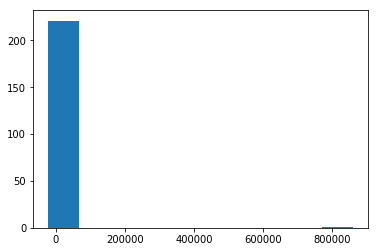

In [187]:
plt.hist(diff)

In [14]:
stats.ttest_ind(ets_error,stl_error)

NameError: name 'ets_error' is not defined